In [370]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

#1.Reading the Dataset BikeSharingDay
import csv
import pandas as pd

#Import Matplotlib for the Plotting
import matplotlib as plt
%matplotlib inline

#Dataset BikeSharing
filename='BikeSharingDay.csv'

#Reading the CSV-File as dataframe
dataframe = pd.read_csv(filename)

#print the head of the dataset
dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [371]:
#List the Data types to See the changes

dataframe.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [372]:
#Changing the Dataset to the right data-typ

#deklaration of the changed datafram
chgDataframe = dataframe

#Die unten gelöschte Attribute werden in unserem Model nicht gebraucht
#und stellt keine Aussage da
chgDataframe = chgDataframe.drop(['yr'], axis=1)
chgDataframe = chgDataframe.drop(['instant'], axis=1)

#Change dteday type from 'object' to 'Date'
chgDataframe.loc[:,'dteday'] = pd.to_datetime(chgDataframe.dteday, format='%Y %m %d')

#da wir

chgDataframe.dtypes

dteday        datetime64[ns]
season                 int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [373]:
#da atemp mit sehr stark

#Koorolations Matrix
corr = chgDataframe.corr()
corr.style.background_gradient(cmap='bwr')


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


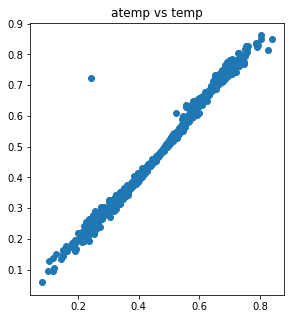

In [374]:
#Da uns auffält das atemp und temp sehr stark mit einander korrelieren
# betrachte wir die zwei Attribute genauer

fig = plt.pyplot.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt1.set_title('atemp vs temp')
plt1.scatter(chgDataframe["atemp"], chgDataframe["temp"])

In [375]:
#Wir sehen das die atemp genauso sie steigert wie temp
#dadurch können atemp aus unserem Datensatz raus droppen
chgDataframe = chgDataframe.drop(['atemp'], axis=1)

In [376]:
# Weiter Attribute die mit einander Korrelieren sind:
# Season und Monat mit 0,831440
correlation = chgDataframe[["season","mnth"]].corr()
correlation.style.background_gradient(cmap='bwr')

,season,mnth
season,1.000000,0.831440
mnth,0.831440,1.000000


In [377]:
# dadurch nehmen wir monat aus unserem Datensatz
chgDataframe = chgDataframe.drop(['mnth'], axis=1)

In [378]:
# Da die Urlaubstage genauso berücktsichtig werden, 
# wie in dem Attribut weekday und workingday, 
# holiday rausschmeisen das selbe gilt für weekday
chgDataframe = chgDataframe.drop(['holiday'], axis=1)
chgDataframe = chgDataframe.drop(['weekday'], axis=1)

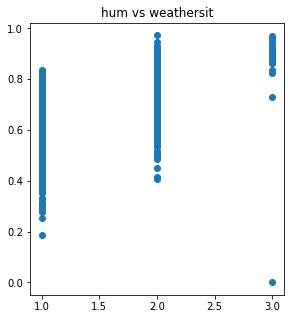

In [379]:
# Wir schauen uns als nächstes die Korrelation zwischen 
# hum und weathersit
fig = plt.pyplot.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt1.set_title('hum vs weathersit')
plt1.scatter(chgDataframe["weathersit"], chgDataframe["hum"])

         temp  weathersit  windspeed       hum
0    0.344167           2   0.160446  0.805833
1    0.363478           2   0.248539  0.696087
2    0.196364           1   0.248309  0.437273
3    0.200000           1   0.160296  0.590435
4    0.226957           1   0.186900  0.436957
..        ...         ...        ...       ...
726  0.254167           2   0.350133  0.652917
727  0.253333           2   0.155471  0.590000
728  0.253333           2   0.124383  0.752917
729  0.255833           1   0.350754  0.483333
730  0.215833           2   0.154846  0.577500

[731 rows x 4 columns]


<AxesSubplot:>

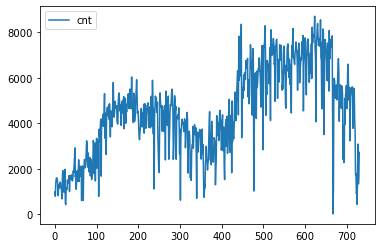

In [380]:
# Wir sehen anhand unseren Korrelationsmatrix 
# das die Attribute: weathersit, temp, windspeed, hum nicht
# mit einander Korrelieren deshalb werden diese Attribute im
# Model benützt
dataframe_X = chgDataframe[["temp","weathersit",'windspeed','hum']]
dataframe_y = chgDataframe[['cnt']]

print(dataframe_X)
dataframe_y.plot()

In [381]:
# Da Weather und Season Kategorisierte Attribute sind, müssen
# wir diese zu Binäre Werte umwandeln
# wir erstellen für jede Kategorie die entsprechnde 
# Binärische Tabelle und geben es dem Datensatz weiter und
# löschen das Attribut weathersit
clear = []
cloudy = []
rain = []
snow = []

# Alle Wetter situationen werden alls binäre Arrays weiter gegeben, dabei wird
# 1 als true und 0 als false angegeben
index = 0
for i in chgDataframe.weathersit:
    if(i == 1):
        clear.append(1)
        cloudy.append(0)
        rain.append(0)
        snow.append(0)
    elif(i == 2):
        clear.append(0)
        cloudy.append(1)
        rain.append(0)
        snow.append(0)
    elif(i == 3):
        clear.append(0)
        cloudy.append(0)
        rain.append(1)
        snow.append(0)
    elif(i == 4):
        clear.append(0)
        cloudy.append(0)
        rain.append(0)
        snow.append(1)
    index += 1

chgDataframe['weatherClear'] = clear
chgDataframe['weatherCloudy'] = cloudy
chgDataframe['weatherRain'] = rain
chgDataframe['weatherSnow'] = snow
chgDataframe = chgDataframe.drop(['weathersit'], axis=1)

In [382]:
# das selbe mit season
spring = []
summer = []
fall = []
winter = []

# Alle Jahreszeiten werden alls binäre Arrays weiter gegeben, dabei wird
# 1 als true und 0 als false angegeben
index = 0
for i in chgDataframe.season:
    if(i == 1):
        spring.append(1)
        summer.append(0)
        fall.append(0)
        winter.append(0)
    elif(i == 2):
        spring.append(0)
        summer.append(1)
        fall.append(0)
        winter.append(0)
    elif(i == 3):
        spring.append(0)
        summer.append(0)
        fall.append(1)
        winter.append(0)
    elif(i == 4):
        spring.append(0)
        summer.append(0)
        fall.append(0)
        winter.append(1)
    index += 1

chgDataframe['seasonSpring'] = spring
chgDataframe['seasonSummer'] = summer
chgDataframe['seasonFall'] = fall
chgDataframe['seasonWinter'] = winter
chgDataframe = chgDataframe.drop(['season'], axis=1)

In [383]:
# Da registered + casual = cnt und cnt unser Ziel Klasse ist werde diese
# raus geschmisse
dataframe_y = chgDataframe.cnt
chgDataframe = chgDataframe.drop(['cnt','registered','casual','dteday'], axis=1)
print(chgDataframe)

     workingday      temp       hum  windspeed  weatherClear  weatherCloudy  \
0             0  0.344167  0.805833   0.160446             0              1   
1             0  0.363478  0.696087   0.248539             0              1   
2             1  0.196364  0.437273   0.248309             1              0   
3             1  0.200000  0.590435   0.160296             1              0   
4             1  0.226957  0.436957   0.186900             1              0   
..          ...       ...       ...        ...           ...            ...   
726           1  0.254167  0.652917   0.350133             0              1   
727           1  0.253333  0.590000   0.155471             0              1   
728           0  0.253333  0.752917   0.124383             0              1   
729           0  0.255833  0.483333   0.350754             1              0   
730           1  0.215833  0.577500   0.154846             0              1   

     weatherRain  weatherSnow  seasonSpring  season

In [384]:
# Unser erster Versuch eine Lineare Regression aufzubauen anhand 
# unseren geänderten Datensatz

# 1. Wir erstellen unseren Modell
dataframe_X = chgDataframe

# 2. Wir schauen uns nochmal die Korrelationsmatrix
corr = dataframe_X.corr()
corr.style.background_gradient(cmap='bwr')

C:\Users\HK5575\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\HK5575\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,workingday,temp,hum,windspeed,weatherClear,weatherCloudy,weatherRain,weatherSnow,seasonSpring,seasonSummer,seasonFall,seasonWinter
workingday,1.000000,0.052660,0.024327,-0.018796,-0.059165,0.050099,0.028820,nan,-0.025926,0.014543,0.016218,-0.005149
temp,0.052660,1.000000,0.126963,-0.157944,0.116091,-0.097706,-0.058238,nan,-0.619800,0.155424,0.678471,-0.224793
hum,0.024327,0.126963,1.000000,-0.248489,-0.575317,0.491834,0.267011,nan,-0.181336,-0.003854,0.023101,0.162732
windspeed,-0.018796,-0.157944,-0.248489,1.000000,-0.003964,-0.037408,0.117362,nan,0.178154,0.097513,-0.139732,-0.135466
weatherClear,-0.059165,0.116091,-0.575317,-0.003964,1.000000,-0.938964,-0.226050,nan,-0.023951,-0.023167,0.109927,-0.064433
weatherCloudy,0.050099,-0.097706,0.491834,-0.037408,-0.938964,1.000000,-0.122859,nan,0.032441,0.038836,-0.102723,0.032716
weatherRain,0.028820,-0.058238,0.267011,0.117362,-0.226050,-0.122859,1.000000,nan,-0.022764,-0.043136,-0.026247,0.093240
weatherSnow,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
seasonSpring,-0.025926,-0.619800,-0.181336,0.178154,-0.023951,0.032441,-0.022764,nan,1.000000,-0.332716,-0.337549,-0.325466
seasonSummer,0.014543,0.155424,-0.003854,0.097513,-0.023167,0.038836,-0.043136,nan,-0.332716,1.000000,-0.341267,-0.329051


In [385]:
dataframe_X.head(5)

,workingday,temp,hum,windspeed,weatherClear,weatherCloudy,weatherRain,weatherSnow,seasonSpring,seasonSummer,seasonFall,seasonWinter
0,0,0.344167,0.805833,0.160446,0,1,0,0,1,0,0,0
1,0,0.363478,0.696087,0.248539,0,1,0,0,1,0,0,0
2,1,0.196364,0.437273,0.248309,1,0,0,0,1,0,0,0
3,1,0.200000,0.590435,0.160296,1,0,0,0,1,0,0,0
4,1,0.226957,0.436957,0.186900,1,0,0,0,1,0,0,0


In [386]:
# Wir schaffen die Indizes raus aus dem Array
array_Y = []

for i in dataframe_y:
    array_Y.append(i)

dataframe_y = array_Y

In [387]:
# 3. Importieren
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 4. Wir nutzen erstmal TrainSplit mit randomSeed
x_train, x_test, y_train, y_test = train_test_split(dataframe_X, dataframe_y, test_size = 0.3, random_state = 0)


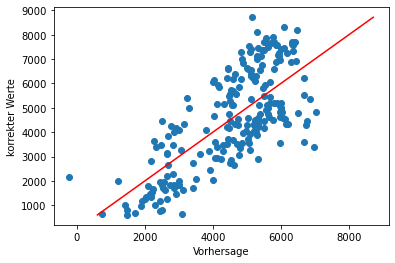

In [407]:
# 5. Wir erstellen die LineareRegression
model = LinearRegression()

# 6. Model füllen mit train daten
model.fit(x_train, y_train)

# 7. Vorhersage mit Testdaten
y_vorhersage = model.predict(x_test)

plt.pyplot.scatter(y_vorhersage, y_test)
minimum = math.ceil(min(y_test))
maximum = math.ceil(max(y_test))
plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
plt.pyplot.xlabel('Vorhersage')
plt.pyplot.ylabel('korrekter Werte')
plt.pyplot.show()

In [408]:
# 8. Berechnung der Mean Squared Error
mse = mean_squared_error(y_test, y_vorhersage)

print(mse)

1884862.4849360946
